0


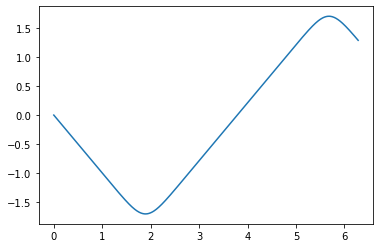

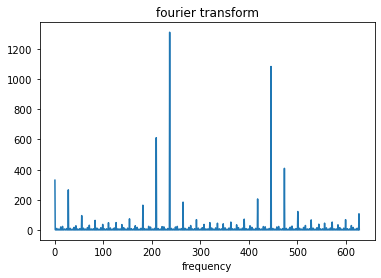

In [25]:
#numerical solution, using rk4 to show F=0.01*x^11
import matplotlib.pylab as p
import numpy as np
import cmath  
from scipy import fft # complex math
        

#   Initialization
a = 0.
b = 6.2832 # b = 2*pi == period 
n = 1000                                         
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0.;   y[1] = -1.
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y): # Force function 
    fReturn[0] = y[1]                                            
    fReturn[1] = -.01*y[0]**11  #F=-.01*x^11 
    return fReturn # returns function

def rk4(t,h,n): #defining the rk4 to solve the ODE            
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y) 
    for i in range(0, n):
        k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y  
        

while (t < b): #loop that runs up to 1 period (2pi)
    if ((t + h) > b):
        h = b - t   #updates h value 
    y = rk4(t,h,2) #calls rk4 
    t = t + h #updates t value for next iteration
    xp=np.append(xp, t) #adds values to arrays
    yp=np.append(yp,y[0])
    
N= len(yp) #defining a N the amount of points/data within one period
h=.01
dftz=np.zeros(N,complex ) #elements for fourier function 
nplot=np.zeros(N)
fplot=np.zeros(N)

    
def fourier(signal): #foruier function
    for n in range (0, N):
        zsum= complex(0.0, 0.0) #zsum element
        for k in range(0, N):
            zexpo = complex(0, 2.*np.pi*k*n/t)          
            zsum += signal[k]*np.exp(-zexpo)
        dftz[n] = zsum * np.sqrt(2.*np.pi) 
        nplot[n] = n/N/.01*2.*np.pi
        w= b/(N*h) # == 2pi/Nh == omega1
        if np.abs(nplot[n]/w) < .01: #omega(n) / omega(1)
            print(n) 
        fplot[n] = np.sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)
        

fourier(yp) #calling the fourier transform for the y obtained from the rk4 method
p.plot(xp,yp) #plotting the function 
p.show()
p.plot(nplot,fplot)
p.title('fourier transform')#plotting the fourier transform
p.xlabel('frequency')
p.show()

    



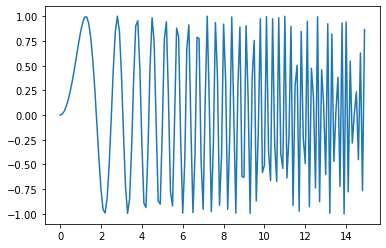

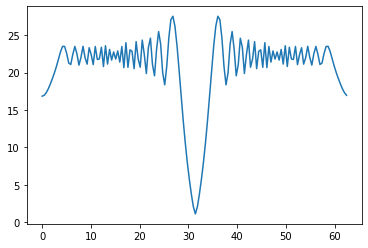

In [36]:
import matplotlib.pyplot as plt
from numpy import *

def func(t):
    if(0<t and t<15): #defining a piecewise function 
        y=sin(t**2) #if inputted t is within range, return this function
    else:
        y=0 #else, return 0
    return y

t=arange(0,15,0.1) #setting up t
y=zeros(len(t)) #setting length of points in y == to the period
for idx in range(len(t)): #setting points in y
    y[idx]=func(t[idx])

plt.plot(t,y) #plots function
plt.show()

N=len(t) #defining variables for fourier transform
dftz=zeros(N,complex )
nplot=zeros(N)
fplot=zeros(N)
step = 0.1

def fourier(signal):  # DFT
    for n in range(0, N):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, 2.*pi*k*n/N) # Complex exponent
          zsum += signal[k]*exp(-zexpo)           
      dftz[n] = zsum * sqrt(2.*pi)      
      nplot[n] = n/N/step*2.*pi  # omega = n 2\pi /T = n 2\pi / (N *step)
      fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)
    
fourier(y) #fourier transform for defined function

plt.plot(nplot,fplot) #plots fourier transform
plt.show()

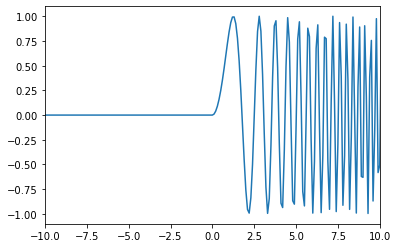

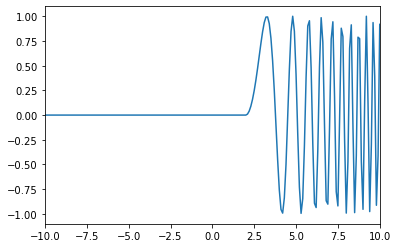

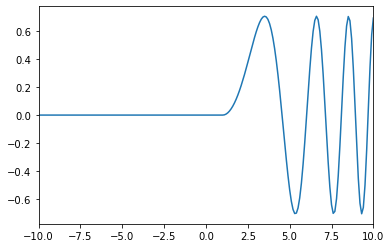

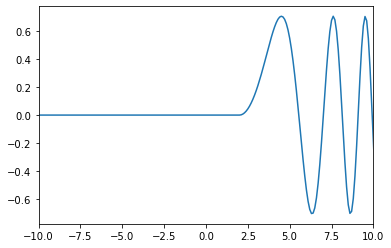

In [37]:
def funcm(t): #mother function, given function
    return func(t)
    
def funcdaughter(t,tau,s):
    y= 1/ sqrt(s) * funcm((t-tau)/s) #daughter wavelet
    return y
 

step=0.1
t=arange(-100.,100.,step)

N=len(t)
y0=zeros(N)
y1=zeros(N)
y2=zeros(N)
y3=zeros(N)
dftz=zeros(N,complex )
nplot=zeros(N)
fplot=zeros(N)
for idx in range(len(t)): #plotting daughter wavelets with different tau & s passed in
    y0[idx]=funcm(t[idx])
    y1[idx]=funcdaughter(t[idx],2.,1.)
    y2[idx]=funcdaughter(t[idx],1.,2.)
    y3[idx]=funcdaughter(t[idx],2.,2.)
    
fig = plt.figure() #plots wavelet transforms
plt.plot(t,y0)
plt.xlim([-10.,10.])
plt.show()
plt.plot(t,y1)
plt.xlim([-10.,10.])
plt.show()
plt.plot(t,y2)
plt.xlim([-10.,10.])
plt.show()
plt.plot(t,y3)
plt.xlim([-10.,10.])
plt.show()



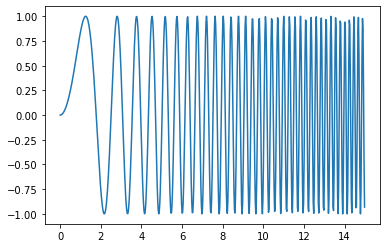

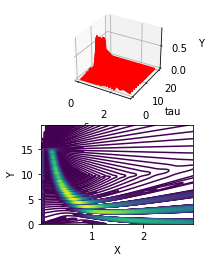

In [40]:
#wavelet transform using mortlet wavelength
nt=600
dtstep=15./nt
tar=arange(0.,15.,dtstep)
ns=100
ntau=300
dstep=3./ns
sar=arange(0.001,3.001,dstep)
dtaustep=20./ntau
tauar=arange(0.,20.,dtaustep)
ystau=zeros((ns, ntau),complex)

def func(t): #given function
    if(0<t and t<15):
        y=sin(t**2)
    else:
        y=0
    return y

t=arange(0,15,0.1)
y=zeros(len(t))
for idx in range(len(t)):
    y[idx]=func(t[idx])

def morlet(t,sigma): #defining the morlet function
    psi=sin(2.*pi*t)*exp(-t*t/2./sigma/sigma)
    return psi

yarr=zeros(nt)
def wavelet():  #defining wavelet function    
    for idext in range(nt):
        yarr[idext]=func(tar[idext]) # y(t) for all t_i
    for idexs in range(ns):
        for idextau in range(ntau): # For each s and tau, integrate t for the wavelet transform
            ystau[idexs,idextau]=1./sqrt(sar[idexs])*sum(conjugate(morlet((tar-tauar[idextau])/sar[idexs],1.))*yarr)*dtstep

wavelet() #calls function to do the wavelet transform 

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p   
#ax = fig.add_subplot(1,1,1,projection='3d')

fig = p.figure()   # Create figure
#ax = Axes3D(fig) 
p.plot(tar,yarr)
fig = p.figure()  
ax = fig.add_subplot(2,2,1,projection='3d')
X, Y = p.meshgrid(sar, tauar) 
ax.plot_surface(X, Y, abs(transpose(ystau)))    # Surface
ax.plot_wireframe(X, Y, abs(transpose(ystau)), color = 'r')  # Add wireframe
ax.set_xlabel('s')
ax.set_ylabel('tau')
ax.set_zlabel('Y')
ax = fig.add_subplot(2,2,3)
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)
CS=p.contour(sar,tauar,transpose(ystau).real, levels=levels)
p.xlabel('X')
p.ylabel('Y')
p.show()
p.show()  #outputted contour graph has a similar contour to the one observed online. 
